In [68]:
import matplotlib.pyplot as plt
import pandas 
import numpy 
import math
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers

In [69]:
dataframe = pandas.read_csv('sj_test.csv',usecols=[4])  
dataset = dataframe.values
dataset = dataset.astype('float32') 

In [70]:
dataframe.head() 

,reanalysis_avg_temp_k
0,-0.596823
1,-0.590959
2,0.065865
3,0.370819
4,0.323903


In [71]:
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test)) 

182 78


In [72]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a) 
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY) 

In [73]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back) 

In [74]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1])) 

In [75]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=40, batch_size=25) 

Epoch 1/40
178/178 [==============================] - 3s 15ms/step - loss: 1.0932
Epoch 2/40
178/178 [==============================] - 0s 415us/step - loss: 1.0668
Epoch 3/40
178/178 [==============================] - 0s 398us/step - loss: 1.0398
Epoch 4/40
178/178 [==============================] - 0s 426us/step - loss: 1.0131
Epoch 5/40
178/178 [==============================] - 0s 398us/step - loss: 0.9869
Epoch 6/40
178/178 [==============================] - 0s 415us/step - loss: 0.9622
Epoch 7/40
178/178 [==============================] - 0s 398us/step - loss: 0.9376
Epoch 8/40
178/178 [==============================] - 0s 409us/step - loss: 0.9144
Epoch 9/40
178/178 [==============================] - 0s 387us/step - loss: 0.8916
Epoch 10/40
178/178 [==============================] - 0s 364us/step - loss: 0.8703
Epoch 11/40
178/178 [==============================] - 0s 378us/step - loss: 0.8483
Epoch 12/40
178/178 [==============================] - 0s 398us/step - loss: 0.8285
Ep

In [76]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX) 
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0])) 
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore)) 

Train Score: 0.61 RMSE
Test Score: 0.62 RMSE


Train Score: 0.61 RMSE
Test Score: 0.62 RMSE


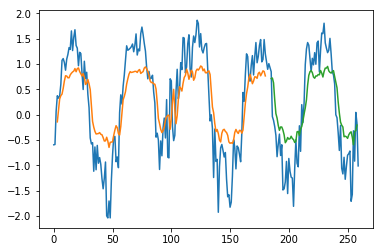

In [77]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot) 
print('Train Score: %.2f RMSE' % (trainScore)) 
print('Test Score: %.2f RMSE' % (testScore))
plt.show() 

In [78]:
model1=Sequential() 
model1.add(LSTM(1000,input_shape=(1,look_back)))
model1.add(Dense(12))
model1.add(Dropout(0.2,input_shape=(look_back,)))
model1.add(Dense(1000))
model1.add(Dense(1)) 
sgd = optimizers.rmsprop(lr=0.005)
model1.compile(loss='mean_absolute_error',optimizer='sgd')
model1.fit(trainX,trainY,epochs=30,batch_size=4) 

Epoch 1/30
178/178 [==============================] - 6s 34ms/step - loss: 0.9450
Epoch 2/30
178/178 [==============================] - 2s 13ms/step - loss: 0.8898
Epoch 3/30
178/178 [==============================] - 2s 14ms/step - loss: 0.8456
Epoch 4/30
178/178 [==============================] - 2s 13ms/step - loss: 0.7735
Epoch 5/30
178/178 [==============================] - 3s 14ms/step - loss: 0.6266
Epoch 6/30
178/178 [==============================] - 2s 14ms/step - loss: 0.4739
Epoch 7/30
178/178 [==============================] - 2s 14ms/step - loss: 0.4345
Epoch 8/30
178/178 [==============================] - 2s 14ms/step - loss: 0.3830
Epoch 9/30
178/178 [==============================] - 2s 14ms/step - loss: 0.4284
Epoch 10/30
178/178 [==============================] - 2s 13ms/step - loss: 0.4252
Epoch 11/30
178/178 [==============================] - 2s 13ms/step - loss: 0.4013
Epoch 12/30
178/178 [==============================] - 2s 14ms/step - loss: 0.4205
Epoch 13/30
1

In [79]:
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX) 
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0])) 
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore)) 

Train Score: 0.40 RMSE
Test Score: 0.43 RMSE


Train Score: 0.40 RMSE
Test Score: 0.43 RMSE


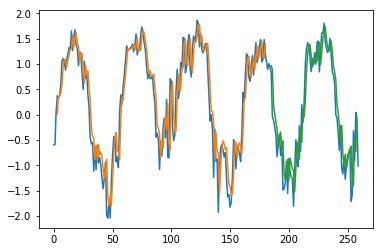

In [80]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore)) 
plt.show() 